<a href="https://colab.research.google.com/github/jrokani/MscMak2025-IntroductionToPython/blob/main/WiDs%20conference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
df = pd.read_csv(r'train.csv')

In [14]:
df = pd.read_csv(r'train.csv')

In [15]:
df.shape

(891, 12)

In [16]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [20]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
cat_cols = df.select_dtypes('object').columns
num_cols = df.select_dtypes(["int","float"]).columns

print(f"The column of the object columns{len(cat_cols)}")
print(f"The number of the numerical columns{len(num_cols)}")

The column of the object columns5
The number of the numerical columns7


In [27]:
for col in cat_cols:
  print(f"{col} have {df[col].nunique()} labels")

Name have 891 labels
Sex have 2 labels
Ticket have 681 labels
Cabin have 147 labels
Embarked have 3 labels


In [28]:
df.drop(["Name","Cabin","Ticket"],axis=1 ,inplace=True)
cat_cols = cat_cols.drop(["Name","Cabin","Ticket"])

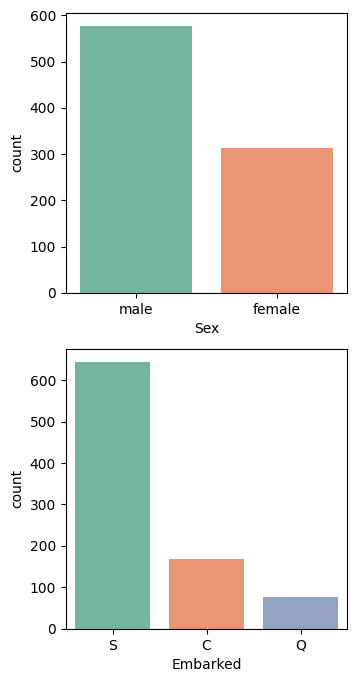

In [29]:
cols = ["Sex","Embarked"]
plt.figure(figsize=(8,8))

for i,col in enumerate(cols):
  plt.subplot(2,2,2*i+1)
  sns.countplot(x=col,data=df,palette="Set2")

  plt.subplot(2,2,2*i+2) #2,4
  counts = df[col].value_counts()
  labels =counts.index
  sizes =counts.values
  plt.pie (sizes,labels=labels,autopct='%1.1f%%,startangle=90'colors=sns)
